## Seed Species Barplot
This project has two main functions, seed_count() and generate_seed_df(). 

seed_count() generates the number of unique seeds for each species present in the miGeneDB. It takes as a parameter the file name of the input table from miGeneDB. If any seeds in this table are repeated, the program omits the repeats. 

The generate_seed_df() saves 2 pieces of information for any seed present in a species. First, it saves the number of species the seed is present in, and second, it saves the node of origin of this seed. 

The plot_seed_df() function takes this data and plots it as a bar plot. Each bar represents a seed, which the height of each bar representing the number of species the seed is present in, and the color of each bar representing its node of origin. The first 11 most abundant nodes of origin are represented in the legend. 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import random
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [2]:
species_list = [
    "Human (Homo sapiens)",
    "Rhesus monkey (Macaca mulatta)",
    "House mouse (Mus musculus)",
    "Norway rat (Rattus norvegicus)",
    "Guinea pig (Cavia porcellus)",
    "Rabbit (Oryctolagus cuniculus)",
    "Dog (Canis familiaris)",
    "Cow (Bos taurus)",
    "Nine-banded armadillo (Dasypus novemcinctus)",
    "Lesser hedgehog tenrec (Echinops telfairi)",
    "Tasmanian devil (Sarcophilus harrisii)",
    "Gray short-tailed opossum (Monodelphis domestica)",
    "Platypus (Ornithorhynchus anatinus)",
    "Chicken (Gallus gallus)",
    "Rock pigeon (Columba livia)",
    "Zebra finch (Taeniopygia guttata)",
    "American alligator (Alligator mississippiensis)",
    "Western painted turtle (Chrysemys picta bellii)",
    "Green anole lizard (Anolis carolinensis)",
    "Burmese python (Python bivittatus)",
    "Schlegels Japanese gecko (Gekko japonicus)",
    "Tuatara (Sphenodon punctatus)",
    "African clawed frog (Xenopus laevis)",
    "Tropical clawed frog (Xenopus tropicalis)",
    "Microcaecilia (Microcaecilia unicolor)",
    "Coelacanth (Latimeria chalumnae)",
    "Pufferfish (Tetraodon nigroviridis)",
    "Cod (Gadus morhua)",
    "Asian swamp eel (Monopterus albus)",
    "Zebrafish (Danio rerio)",
    "Spotted gar (Lepisosteus oculatus)",
    "Cloudy Catshark (Scyliorhinus torazame)",
    "Australian ghostshark (Callorhinchus milii)",
    "Inshore hagfish (Eptatretus burgeri)",
    "Sea Lamprey (Petromyzon marinus)",
    "Sea Squirt (Ciona intestinalis)",
    "Florida lancelet (Branchiostoma floridae)",
    "European lancelet (Branchiostoma lanceolatum)",
    "Saccoglossus (Saccoglossus kowalevskii)",
    "Ptychodera (Ptychodera flava)",
    "Purple sea urchin (Strongylocentrotus purpuratus)",
    "Bat starfish (Patiria miniata)",
    "Xenoturbella (Xenoturbella bocki)",
    "Fruit fly (Drosophila melanogaster)",
    "Fruit fly (Drosophila simulans)",
    "Fruit fly (Drosophila yakuba)",
    "Fruit fly (Drosophila ananassae)",
    "Fruit fly (Drosophila mojavensis)",
    "Yellow fever mosquito (Aedes aegypti)",
    "Longwing butterfly (Heliconius melpomene)",
    "Red flour beetle (Tribolium castaneum)",
    "Cockroach (Blattella germanica)",
    "Common water flea (Daphnia pulex)",
    "Large common water flea (Daphnia magna)",
    "Deer tick (Ixodes scapularis)",
    "Arizona bark scorpion (Centruroides sculpturatus)",
    "Atlantic horseshoe crab (Limulus polyphemus)",
    "Roundworm (Caenorhabditis elegans)",
    "Roundworm (Caenorhabditis briggsae)",
    "Large roundworm (Ascaris suum)",
    "Polychaete worm (Capitella teleta)",
    "Common brandling worm (Eisenia fetida)",
    "Owl limpet (Lottia gigantea)",
    "Pacific oyster (Crassostrea gigas)",
    "Chambered Nautilus (Nautilus pompilius)",
    "Hawaiian bobtail squid (Euprymna scolopes)",
    "California two-spot octopus (Octopus bimaculoides)",
    "Common octopus (Octopus vulgaris)",
    "Lingula (Lingula anatina)",
    "Freshwater planarian (Schmidtea mediterranea)",
    "Rotifer (Brachionus plicatilis)",
    "Starlet sea anemone (Nematostella vectensis)",
    "Freshwater-polyp (Hydra vulgaris)",
    "Amphimedon (Amphimedon queenslandica)",
    "Muellers freshwater sponge (Ephydatia muelleri)"
]

In [3]:
def seed_count(species):
    #returns real coverage and seed number from mature data
    df = pd.read_csv("Total miGeneDB/"+species+'.csv')
   
    filename_data = df['Seed']
    
    #remove repeats
    filename_data = [*set(filename_data)]
    
    #final data
    seed_number = len(filename_data)

    print(species+ ": "+str(seed_number))

In [4]:
for i in species_list:
    seed_count(i)

Human (Homo sapiens): 392
Rhesus monkey (Macaca mulatta): 357
House mouse (Mus musculus): 317
Norway rat (Rattus norvegicus): 278
Guinea pig (Cavia porcellus): 278
Rabbit (Oryctolagus cuniculus): 264
Dog (Canis familiaris): 313
Cow (Bos taurus): 317
Nine-banded armadillo (Dasypus novemcinctus): 260
Lesser hedgehog tenrec (Echinops telfairi): 237
Tasmanian devil (Sarcophilus harrisii): 260
Gray short-tailed opossum (Monodelphis domestica): 293
Platypus (Ornithorhynchus anatinus): 234
Chicken (Gallus gallus): 171
Rock pigeon (Columba livia): 153
Zebra finch (Taeniopygia guttata): 149
American alligator (Alligator mississippiensis): 151
Western painted turtle (Chrysemys picta bellii): 164
Green anole lizard (Anolis carolinensis): 149
Burmese python (Python bivittatus): 124
Schlegels Japanese gecko (Gekko japonicus): 129
Tuatara (Sphenodon punctatus): 112
African clawed frog (Xenopus laevis): 161
Tropical clawed frog (Xenopus tropicalis): 139
Microcaecilia (Microcaecilia unicolor): 121
Coe

In [5]:
def generate_seed_df(species_list):
    #Get Seeds
    df_list = []
    seeds = []
    for species in species_list:
        df = pd.read_csv("Total miGeneDB/"+species+'.csv')
        df_list.append(df)
        seeds = seeds + list(df['Seed'])
    seeds = [*set(seeds)]

    #get species count
    species_count = []
    for seed in seeds:
        count_of_species_for_seed = 0
        for df in df_list:
            if seed in list(df['Seed']):
                count_of_species_for_seed += 1
        species_count.append(count_of_species_for_seed)
    
    #get seed origin
    seed_origin = []
    df = pd.read_csv("Total miGeneDB/All_species.csv")
    for seed in seeds:
        row = df[df['Seed']==seed].first_valid_index()
        seed_origin.append(df['Node of origin (family)'][row])
        
    #zip all into a dataframe
    seed_df = pd.DataFrame({'Seed': seeds, 'Species Count': species_count, 'Node of origin (family)':seed_origin})
    
    seed_df = seed_df.sort_values(by=['Species Count'], ascending=False)
    
    seed_df.to_csv('seed_df.csv')
    print('Done!')

In [6]:
generate_seed_df(species_list)

Done!


In [7]:
 def plot_seed_df(seed_df):
    #colors
    np.random.seed(seed=1)
    color_dict = {}
    for origin in seed_df['Node of origin (family)']:
        color_dict[origin] = (0,0,0,1)
    labels = ['Eumetazoa', 'Bilateria', 'Deuterostomia', 'Chordata', 'Olfactores', 'Vertebrata', 'Gnathostomata', 
             'Osteichthyes', 'Sarcopterygii','Mammalia', 'Eutheria']
    i = 0
    for label in labels:
        color_dict[label] = cm.get_cmap('YlOrRd')(i*25)
        i+=1
    colors = [color_dict[i] for i in seed_df['Node of origin (family)']]
    
    #font
    font = {'family' : 'Helvetica',
        'weight' : 'bold',
        'size'   : 18}
    plt.rc('font', **font)
    
    #figure 
    fig,ax = plt.subplots(figsize=(12,10))
    fig.patch.set_facecolor('white')
    plt.title("Seed Species Barplot")
    plt.xlabel("Seed")
    plt.ylabel("Number of Species")
    
    #bar plot
    N = 1000
    plt.bar(seed_df.index[:N], seed_df['Species Count'][:N], width=1, color = colors)
    
    #legend
    plt.rcParams.update({'font.size': 12})
    handles = [plt.Rectangle((0,0),1,1, color=color_dict[label]) for label in labels]+[plt.Rectangle((0,0),1,1, color='black')]
    labels = labels+['Other']
    plt.legend(handles, labels, prop = {"size":15}, loc ="upper right", ncol=2)
    
    #Save plot 
    plt.xticks([])
    plt.margins(tight=True)
    plt.savefig("Seed Species Barplot.svg", dpi = 200, facecolor=fig.get_facecolor())
    plt.show()

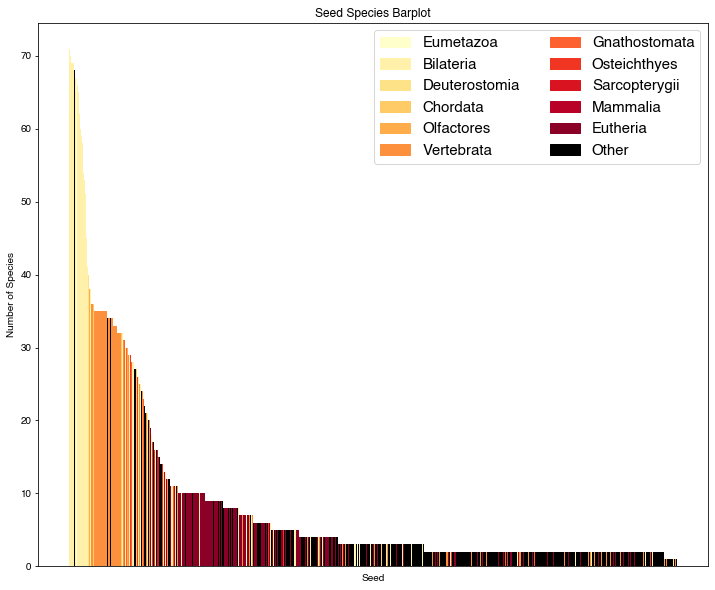

In [8]:
seed_df = pd.read_csv('seed_df.csv')
plot_seed_df(seed_df)